This notebook and the data used in these examples come from the [D-Lab's GitHub repository](https://github.com/dlab-berkeley/Python-Machine-Learning-Fundamentals).  I have added some additional examples and exercises, so the version of the notebook we are using is available in this [GitHub repository](https://github.com/cbrownley/NYU-Python-Workshop).

We will be opening and running these notebooks in [Google Colab](https://colab.research.google.com) to avoid needing to install packages locally, but if you want to run these notebooks locally you are welcome to [install Python](https://www.anaconda.com) on your computer and [clone this repo](https://www.atlassian.com/git/tutorials/setting-up-a-repository/git-clone).  (Note: this notebook assumes that the data files are in a directory named `data/`, found within your current working directory, if they are not specified with a URL.)

In [ ]:
!pip install matplotlib==3.5.2

# Classification

A common task in computational research is to classify an object based on a set of features.  In supervised machine learning, we can give an algorithm a dataset of training examples with specific features and a categorical target.  With enough training examples, a model can recognize important features in determining an object's target class. This model can then be used to predict the class of a new object, given its known features.

## 1) Iris Dataset

We'll start off by loading scikit-learn's [Iris](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) dataset. Using this dataset we can classify an iris flower as one of three types: setosa, versicolour, or virginica. The features that we'll use to predict this are sepal length, sepal width, petal length, and petal width.

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
type(iris)

sklearn.utils.Bunch

Let's look inside of it to see what datatypes scikit-learn wants, and how their sample dataset is formatted, so that we can prepare our own datasets later:

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

So the data is in dictionary format, and we can access the data and labels by indexing certain keys:

In [6]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Again, here are the features:

In [7]:
print(iris.feature_names)
print(len(iris.feature_names))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
4


And here's what we're predicting:

In [8]:
print(iris.target_names)
print(len(iris.target_names))

['setosa' 'versicolor' 'virginica']
3


So we are using 4 features for each observation, trying to classfiy each observation into one of three categories, using only those 4 features. How are these input features formatted?

In [9]:
print(iris.data.shape)
print(type(iris.data))
iris.data[0:2]

(150, 4)
<class 'numpy.ndarray'>


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

We have a large numpy array of length 150, one for each observation, and each observation has its own numpy array of length 4, one for each feature. Each inner array *must* lineup with the order of the variables *and* all other arrays. **ORDER MATTERS**.

What about the target?

In [10]:
print(iris.target.shape)
print(type(iris.target))
iris.target

(150,)
<class 'numpy.ndarray'>


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Again, we have 150 observations, but *no* sub arrays. The target data is one dimension. Order matters here as well, they should correspond to the feature indices in the data array. The targets are the correct classes corresponding each observation in our dataset.

In other words, the data and the targets indices should match up like this for three of the observations:

In [11]:
for x in [0, 50, 100]:
    print("Data:", iris.data[x])
    print("Target:", iris.target[x])

Data: [5.1 3.5 1.4 0.2]
Target: 0
Data: [7.  3.2 4.7 1.4]
Target: 1
Data: [6.3 3.3 6.  2.5]
Target: 2


Hopefully this helps you convert your data from CSV or other formats into the correct numpy arrays for scikit-learn.

Now we will split the data into training and testing, but first thing's first: **set the random seed!** This is very important for reproducibility of your analyses.

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

np.random.seed(10)

Here we'll use 75% of the data for training, and test on the remaining 25%.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25)

In [14]:
X_train.shape, X_test.shape

((112, 4), (38, 4))

Now that we've split our data up into `train` and `test` sets, let's look to see how the target classes are distributed within the two datasets. This is known as the **class distribution**.

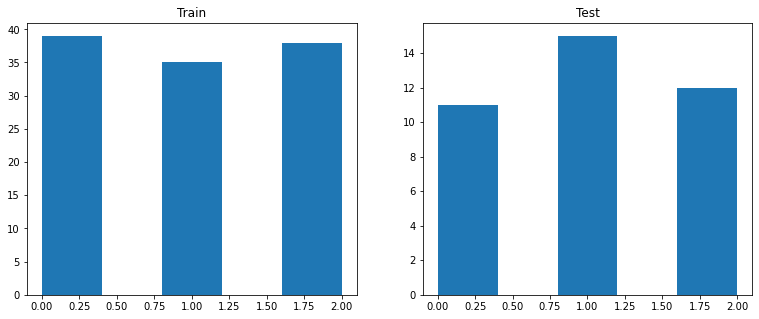

In [15]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.hist(y_train, bins=5)
plt.title('Train')
plt.subplot(1,2,2)
plt.hist(y_test, bins=5);
plt.title('Test');

Imbalanced classes can cause problems for model performance and evaluation. 

When we started, there was an equal distribution of 50 observations for each target class in the dataset. After splitting the data in training and testing sets, we didn't distribute the target classes evenly across our partitions. Fortunately we can tell `sklearn` to split targets in equal distributions using the `stratify` parameter as follows:

In [16]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.20,
                                                   stratify=iris.target)

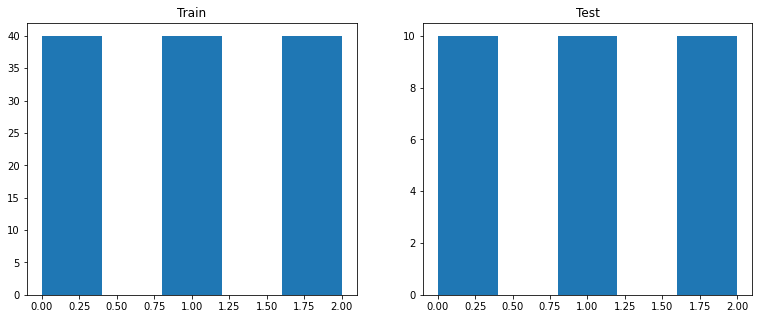

In [17]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.hist(y_train, bins=5)
plt.title('Train')
plt.subplot(1,2,2)
plt.hist(y_test, bins=5);
plt.title('Test');

That's much better, they are all equal now!

## 2) Decision Trees

The first model we're going to explore is [Decision Trees: Classification](http://scikit-learn.org/stable/modules/tree.html#classification).

After the train/test split, scikit-learn makes the rest of the process relatively easy since it already has a Decision Tree (DT) classifier for us, we just have to choose the parameters:

In [40]:
from sklearn import tree

dt_classifier = tree.DecisionTreeClassifier()

We then use the `fit` method to fit our model to the training data. The syntax is a little strange at first, but it's powerful. All the functions for fitting data, making predictions, and storing parameters are encapsulated in a single model object. 

In [41]:
dt_classifier.fit(X_train, y_train);

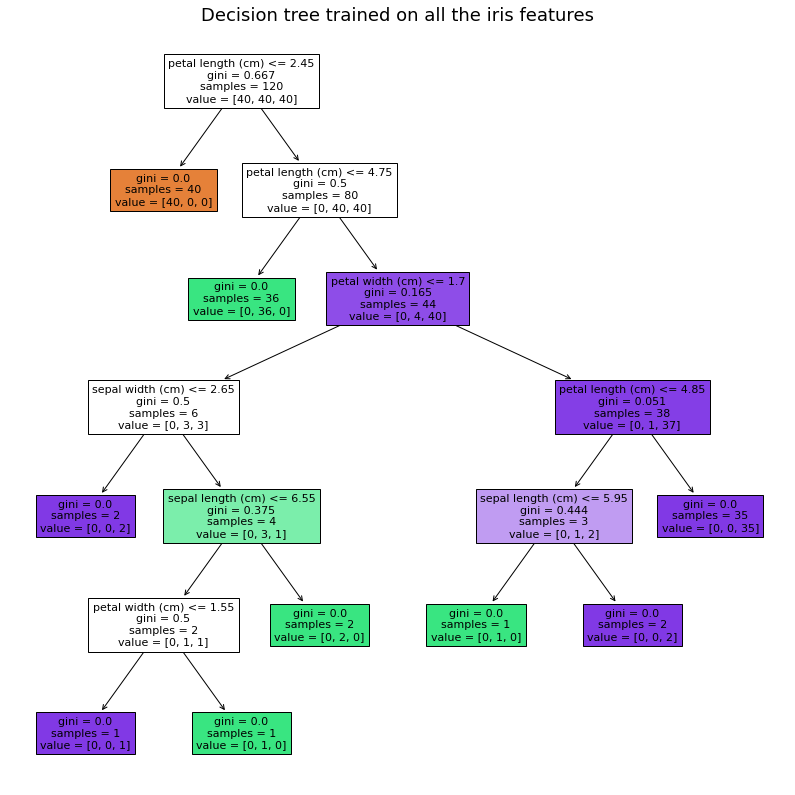

In [42]:
# SOURCE: https://scikit-learn.org/stable/modules/tree.html
# https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

from sklearn.tree import plot_tree, export_text

plt.figure(figsize=(14,14))
plot_tree(dt_classifier, feature_names=iris.feature_names, filled=True)
plt.title("Decision tree trained on all the iris features", fontsize=18);

In [45]:
r = export_text(dt_classifier, feature_names=iris['feature_names'])
print(r)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- class: 1
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.70
|   |   |   |--- sepal width (cm) <= 2.65
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  2.65
|   |   |   |   |--- sepal length (cm) <= 6.55
|   |   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.55
|   |   |   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.70
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |   |--- class: 2
|   |   |   |--- petal length (cm) >  4.85
|   |   |   |   |--- class: 2



To see how our model performs on the test data, we use the `score` method which returns the mean accuracy. Accuracy can be defined as:

$$ Accuracy= \frac{\sum{\text{True Positives}}+\sum{\text{True Negatives}}}{\sum{\text{Total Population}}}$$

Where "True Positives" are those data points whose value should be 1, and they are predicted to be 1, and "True Negatives" are those data points whose values should be 0, and they are predicted to be 0.

`score` can be used on both the train and test datasets. Using the train data will give us the in-sample accuracy score.

In [20]:
print(dt_classifier.score(X_train, y_train))

1.0


That's a perfect score of `1.0`! But the model may be overfit to the train data, so we should evaluate the performance of this model using the test data.

In [21]:
print(dt_classifier.score(X_test, y_test))

0.9


Not quite perfect, but still really good!

We can get the feature importance (Gini importance) of the four features to see which one(s) are important in determining the classification:

In [22]:
dt_classifier.feature_importances_

array([0.        , 0.01666667, 0.43551635, 0.54781699])

Looks like the fourth variable is most important. Let's find out which feature that is.

In [23]:
iris.feature_names[dt_classifier.feature_importances_.argmax()]

'petal width (cm)'

In [32]:
dict(zip(iris.feature_names, [round(val,3) for val in list(dt_classifier.feature_importances_)]))

{'sepal length (cm)': 0.0,
 'sepal width (cm)': 0.017,
 'petal length (cm)': 0.436,
 'petal width (cm)': 0.548}

There are  metrics other than accuracy to quantify classification performance. Some common metrics in machine learning are:

1. **Precision**: 
$$\frac{\sum{\text{True Positives}}}{\sum{\text{Predicted Positives}}}$$
2. **Recall** (or **Sensitivity**): 
$$\frac{\sum{\text{True Positives}}}{\sum{\text{Condition Positives}}}$$ 
3. **Specificity** (like recall for negative examples): 
$$\frac{\sum{\text{True Negatives}}}{\sum{\text{Condition Negatives}}}$$


Below is a table showing how these metrics fit in with other confusion matrix concepts like "True Positives" and "True Negatives" [wikipedia](https://en.wikipedia.org/wiki/Confusion_matrix)

<img src='https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg' width=500>

After being fitted, the model can then be used to predict the class of samples:

In [35]:
dt_classifier.predict(X_test)

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2, 1, 2,
       0, 2, 0, 1, 2, 2, 1, 1])

As an alternative to outputting a specific class, the probability of each class can be predicted:

In [36]:
dt_classifier.predict_proba(X_test)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

Scikit-learn can print out the **Recall** and **Precision** scores for a classification model by using `metrics.classification_report()`.

In [24]:
from sklearn import metrics

dt_predicted = dt_classifier.predict(X_test)
print("Classification report:")
print(metrics.classification_report(y_test, dt_predicted)) 

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



## 3) Tuning Hyperparameters: Cross-Validation & Grid Search

Tuning hyperparameters is one of the most important steps in building a ML model. Hyperparameters are external to the model cannot be estimated from data, so you, the modeler, must pick these!

One way to find the best combination of hyperparameters is by using what's called a [grid search](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). A grid search tests different possible parameter combinations to see which combination yields the best results. Fortunately, scikit-learn has a function for this which makes it very easy to do.

Here, we'll see what the best combination of the hyperparameters `min_samples_split` and `min_samples_leaf` are. We can make a dictionary with the names of the hyperparameters as the keys and the range of values as the corresponding values.

In [46]:
param_grid = {'min_samples_split': range(2,10),
              'min_samples_leaf': range(1,10)}

param_grid

{'min_samples_split': range(2, 10), 'min_samples_leaf': range(1, 10)}

Then we can implement the grid search and fit our model according to the best parameters.

In [47]:
from sklearn.model_selection import GridSearchCV

model_dt = GridSearchCV(dt_classifier, param_grid, cv=3, return_train_score=True)
model_dt.fit(X_train, y_train);

We can see what the model parameters are that produce the highest accuracy on the test set data by finding the max `mean_test_score`, and it's assoiated parameter values:

In [48]:
best_index = np.argmax(model_dt.cv_results_["mean_test_score"])

print('Best parameter values are:', model_dt.cv_results_["params"][best_index])
print('Best Mean Cross-Validation train accuracy: %.03f' % (model_dt.cv_results_["mean_train_score"][best_index]))
print('Best Mean Cross-Validation test (validation) accuracy: %.03f' % (model_dt.cv_results_["mean_test_score"][best_index]))
print('Overal mean test accuracy: %.03f' % (model_dt.score(X_test, y_test)))

Best parameter values are: {'min_samples_leaf': 3, 'min_samples_split': 5}
Best Mean Cross-Validation train accuracy: 0.983
Best Mean Cross-Validation test (validation) accuracy: 0.967
Overal mean test accuracy: 0.900


We can also look at all of the combinations and their test and train scores:

In [49]:
n_grid_points = len(model_dt.cv_results_['params'])
min_samples_leaf_vals = np.empty((n_grid_points,))
min_samples_split_vals = np.empty((n_grid_points,))
mean_train_scores = np.empty((n_grid_points,))
mean_test_scores = np.empty((n_grid_points,))
for i in range(n_grid_points):
    min_samples_leaf_vals[i] = model_dt.cv_results_['params'][i]['min_samples_leaf']
    min_samples_split_vals[i] = model_dt.cv_results_['params'][i]['min_samples_split']
    mean_train_scores[i] = model_dt.cv_results_['mean_train_score'][i]
    mean_test_scores[i] = model_dt.cv_results_['mean_test_score'][i]

In [27]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

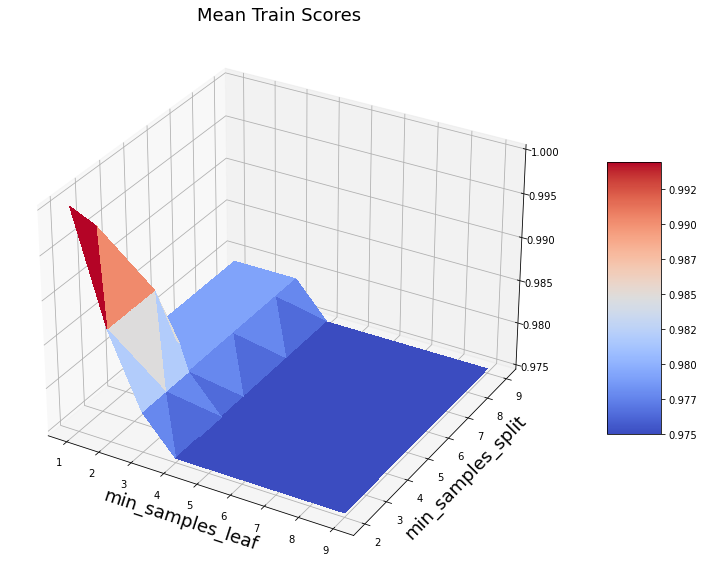

In [52]:
# SOURCE: https://matplotlib.org/3.5.0/gallery/mplot3d/surface3d.html

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(20,10))
surf = ax.plot_trisurf(min_samples_leaf_vals, 
                       min_samples_split_vals, 
                       mean_train_scores, 
                       cmap=cm.coolwarm,
                       linewidth=10, 
                       antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_formatter('{x:.03f}')

# Set title and axis labels.
ax.set_title('Mean Train Scores', fontsize=18)
ax.set_xlabel('min_samples_leaf', fontsize=18)
ax.set_ylabel('min_samples_split', fontsize=18)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5, format='%.3f');

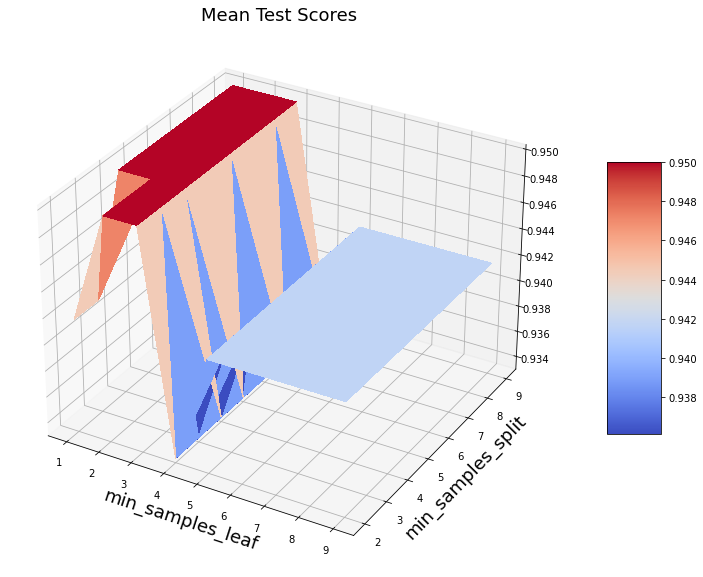

In [53]:
# SOURCE: https://matplotlib.org/3.5.0/gallery/mplot3d/surface3d.html

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(20,10))
surf = ax.plot_trisurf(min_samples_leaf_vals, 
                       min_samples_split_vals, 
                       mean_test_scores, 
                       cmap=cm.coolwarm,
                       linewidth=10, 
                       antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_formatter('{x:.03f}')

# Set title and axis labels.
ax.set_title('Mean Test Scores', fontsize=18)
ax.set_xlabel('min_samples_leaf', fontsize=18)
ax.set_ylabel('min_samples_split', fontsize=18)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5, format='%.3f');

## 4) Random Forests

Now we'll look at [Random Forests](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

- random forests are an ensemble method (the classification decision is pooled across many simpler classifiers)
- each decision tree is fit to a subset of the data (bagging), and uses only a subset of the features (random subspace). 

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn import ensemble

rf_classifier = ensemble.RandomForestClassifier()

Now we fit the model on our training data.

In [51]:
rf_model = rf_classifier.fit(X_train, y_train)

Let's look at the classification performance on the test data:

In [52]:
print("Score of model with test data defined above:")
print(rf_model.score(X_test, y_test))
print()

predicted = rf_model.predict(X_test)
print("Classification report:")
print(metrics.classification_report(y_test, predicted)) 
print()

Score of model with test data defined above:
0.9333333333333333

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30




Let's do another grid search to determine the best parameters:

In [53]:
param_grid = {'min_samples_split': range(2,10),
              'min_samples_leaf': range(1,10)}

model_rf = GridSearchCV(ensemble.RandomForestClassifier(n_estimators=10), param_grid, cv=3)
model_rf.fit(X_train, y_train)

best_index = np.argmax(model_rf.cv_results_["mean_test_score"])

print("Best parameter values:", model_rf.cv_results_["params"][best_index])
print("Best Mean cross-validated test accuracy:", model_rf.cv_results_["mean_test_score"][best_index])
print("Overall Mean test accuracy:", model_rf.score(X_test, y_test))

Best parameter values: {'min_samples_leaf': 2, 'min_samples_split': 8}
Best Mean cross-validated test accuracy: 0.975
Overall Mean test accuracy: 0.9333333333333333


## 5) Predict

Great! That's quite accurate. So let's say we're walking through a garden and spot an iris, but have no idea what type it is. We take some measurements:

In [34]:
random_iris = [5.1, 3.5, 2, .1]

for i in range(len(random_iris)):
    print(iris.feature_names[i])
    print(random_iris[i])
    print()

sepal length (cm)
5.1

sepal width (cm)
3.5

petal length (cm)
2

petal width (cm)
0.1



Can we use our model to predict the type?

In [35]:
label_idx = model_rf.predict([random_iris])
label_idx

array([0])

Now we can just index our labels:

In [36]:
iris.target_names[label_idx]

array(['setosa'], dtype='<U10')

# Challenge: AdaBoost

Adaboost is another ensemble method that relies on 'boosting'. Similar to 'bagging', 'boosting' samples many subsets of data to fit multiple classifiers, but resamples preferentially for mis-classified data points. 

### Part 1

Using the scikit-learn [documentation](http://scikit-learn.org/stable/modules/ensemble.html#adaboost), build your own AdaBoost model to test on the iris data set! Start off with `n_estimators` at 100, and `learning_rate` at .5. Use 10 as the `random_state` value.

### Part 2

Now use a grid search to determine what the best values for the `n_estimators` and `learning_rate` parameters are. For `n_estimators` try a range of 50 to 500 with a step of 50, and for `learning_rate` try a range of .1 to 1.1 with a step of .1. For decimal steps in a range use the `np.arange` function.